In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
data=pd.read_csv('census_income.csv')
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
data.shape

(32560, 15)

In [30]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [31]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Checking for null values

In [32]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

#### checking for columns which has 0 values

In [33]:
for column_name in data.columns:
    column = data[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Age  is :  0
Count of zeros in column  Workclass  is :  0
Count of zeros in column  Fnlwgt  is :  0
Count of zeros in column  Education  is :  0
Count of zeros in column  Education_num  is :  0
Count of zeros in column  Marital_status  is :  0
Count of zeros in column  Occupation  is :  0
Count of zeros in column  Relationship  is :  0
Count of zeros in column  Race  is :  0
Count of zeros in column  Sex  is :  0
Count of zeros in column  Capital_gain  is :  29849
Count of zeros in column  Capital_loss  is :  31041
Count of zeros in column  Hours_per_week  is :  0
Count of zeros in column  Native_country  is :  0
Count of zeros in column  Income  is :  0


#### Seperate DataFrame for the categorical columns

In [34]:
df_categorical=pd.DataFrame(data[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']])
df_categorical

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


### Visualization of the Categorical columns

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


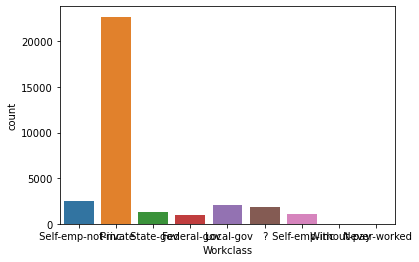

In [35]:
ax=sns.countplot(x='Workclass',data=df_categorical)
print(df_categorical['Workclass'].value_counts())

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


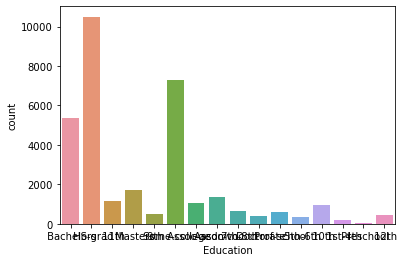

In [36]:
ax=sns.countplot(x='Education',data=df_categorical)
print(df_categorical['Education'].value_counts())

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


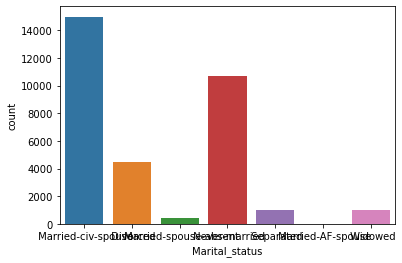

In [37]:
ax=sns.countplot(x='Marital_status',data=df_categorical)
print(df_categorical['Marital_status'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


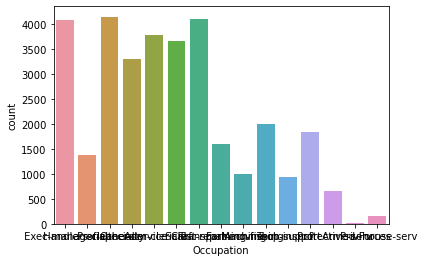

In [38]:
ax=sns.countplot(x='Occupation',data=df_categorical)
print(df_categorical['Occupation'].value_counts())

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


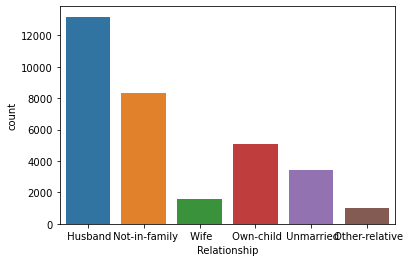

In [39]:
ax=sns.countplot(x='Relationship',data=df_categorical)
print(df_categorical['Relationship'].value_counts())

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


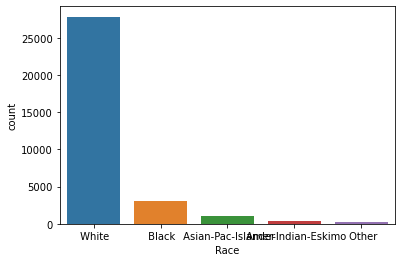

In [40]:
ax=sns.countplot(x='Race',data=df_categorical)
print(df_categorical['Race'].value_counts())

 Male      21789
 Female    10771
Name: Sex, dtype: int64


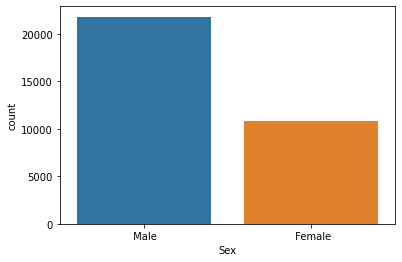

In [41]:
ax=sns.countplot(x='Sex',data=df_categorical)
print(df_categorical['Sex'].value_counts())

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

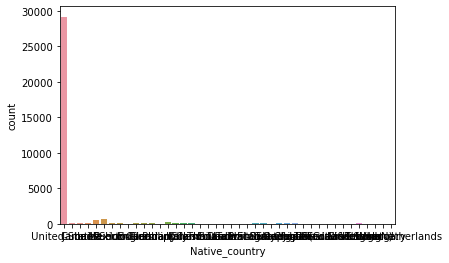

In [42]:
ax=sns.countplot(x='Native_country',data=df_categorical)
print(df_categorical['Native_country'].value_counts())

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


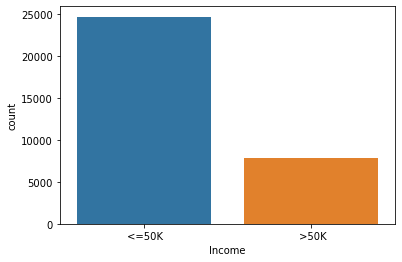

In [43]:
ax=sns.countplot(x='Income',data=df_categorical)
print(df_categorical['Income'].value_counts())

#### Checking the Distribution of the Continuous data

In [44]:
df_continuous=data.drop(columns=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income'])
df_continuous

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


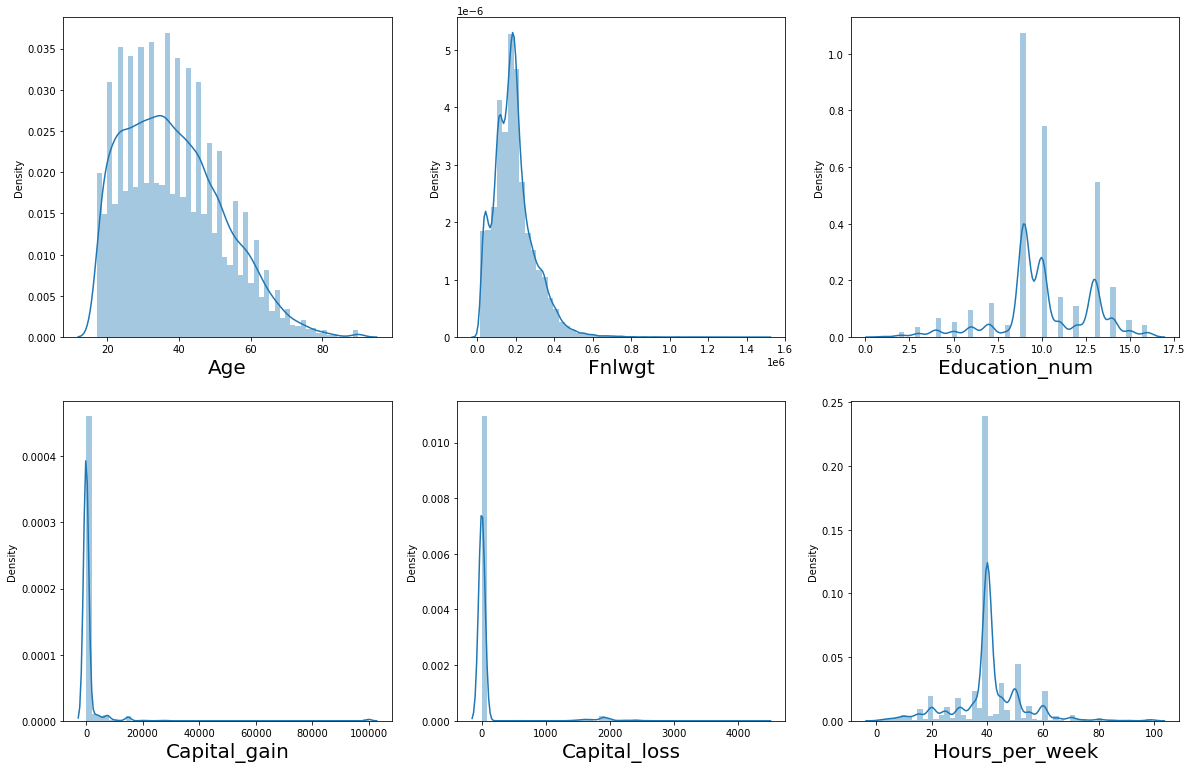

In [45]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df_continuous:
    if plotnumber<=25:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_continuous[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Encoding of the Dataset

In [46]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

### Checking the correlation

In [47]:
data.corr()['Income']

Age               0.234039
Workclass         0.051645
Fnlwgt           -0.009481
Education         0.079311
Education_num     0.335182
Marital_status   -0.199295
Occupation        0.075448
Relationship     -0.250924
Race              0.071853
Sex               0.215995
Capital_gain      0.223333
Capital_loss      0.150523
Hours_per_week    0.229690
Native_country    0.015845
Income            1.000000
Name: Income, dtype: float64

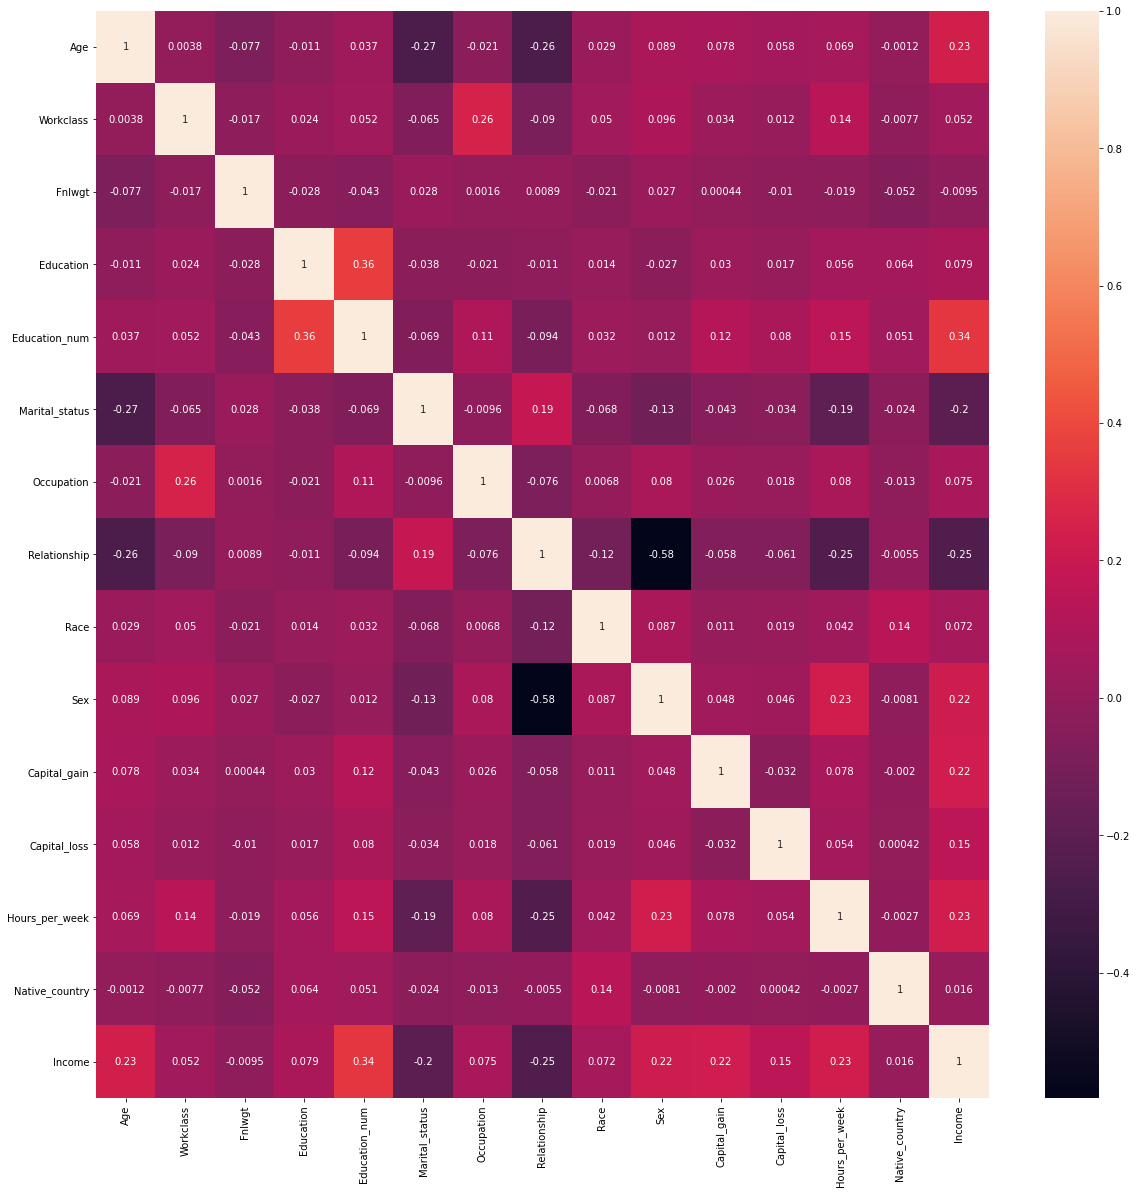

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Dropping columns which has less relationship

In [49]:
data_new=data.drop(columns=['Fnlwgt','Native_country'])

### Checking for outliers using boxplot

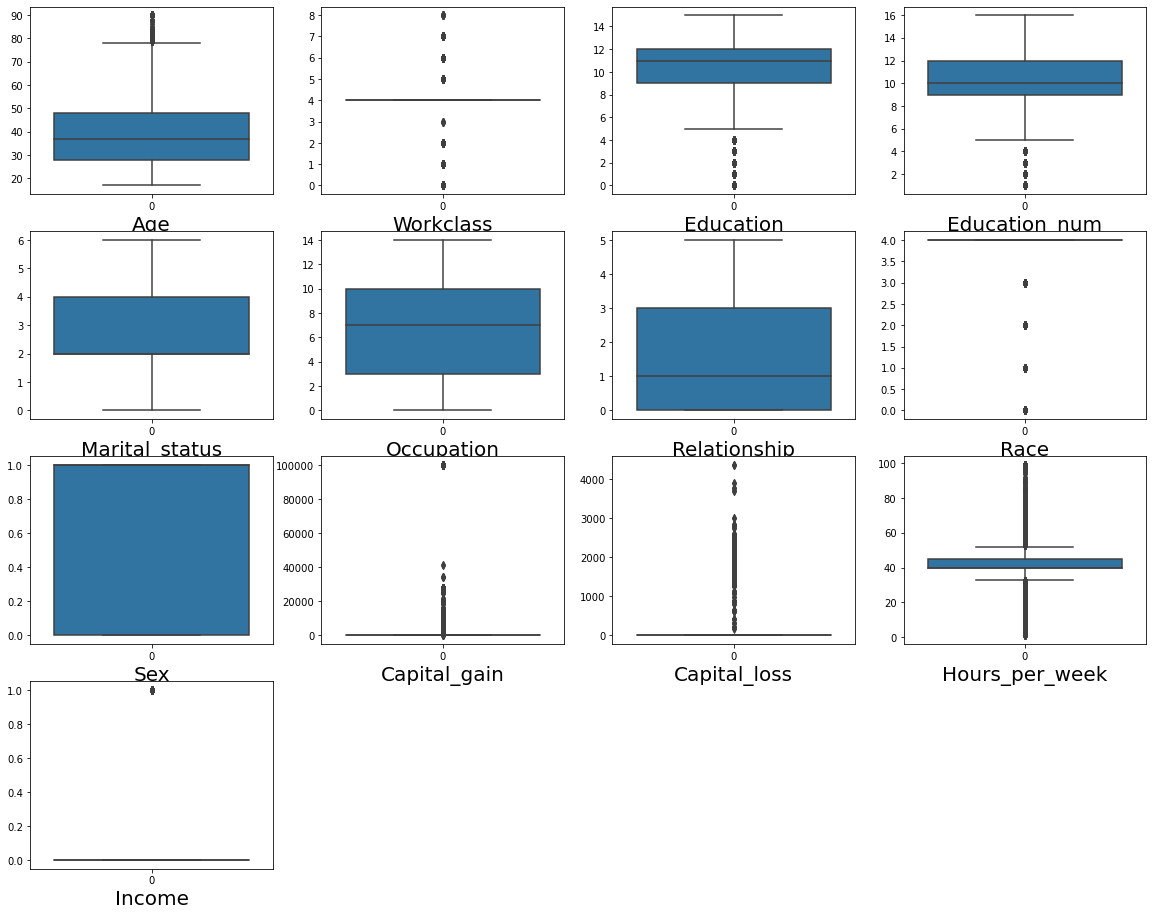

In [50]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data_new:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data=data_new[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We are not removing the outliers since they are present in categorical column and some are possible outcomes

### Dividing the Dataset into dependent and independent variable

In [51]:
x=data_new.drop(columns='Income')
y=data_new['Income']

In [52]:
x

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50,6,9,13,2,4,0,4,1,0,0,13
1,38,4,11,9,0,6,1,4,1,0,0,40
2,53,4,1,7,2,6,0,2,1,0,0,40
3,28,4,9,13,2,10,5,2,0,0,0,40
4,37,4,12,14,2,4,5,4,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,4,0,0,0,38
32556,40,4,11,9,2,7,0,4,1,0,0,40
32557,58,4,11,9,6,1,4,4,0,0,0,40
32558,22,4,11,9,4,1,3,4,1,0,0,20


In [53]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

### Checking Skewness

In [54]:
x.skew().sort_values()

Race              -2.435332
Education         -0.934063
Workclass         -0.752280
Sex               -0.719244
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Hours_per_week     0.227636
Age                0.558738
Relationship       0.786784
Capital_loss       4.594549
Capital_gain      11.953690
dtype: float64

### Transform data to remove skewness

In [55]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

### Scaling the data

In [56]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[ 0.89194656,  1.64422286, -0.47701209, ..., -0.30136989,
        -0.2212132 , -2.22151541],
       [ 0.10271741,  0.01186427,  0.09048172, ..., -0.30136989,
        -0.2212132 , -0.03557001],
       [ 1.06438077,  0.01186427, -2.06759959, ..., -0.30136989,
        -0.2212132 , -0.03557001],
       ...,
       [ 1.33455599,  0.01186427,  0.09048172, ..., -0.30136989,
        -0.2212132 , -0.03557001],
       [-1.35834147,  0.01186427,  0.09048172, ..., -0.30136989,
        -0.2212132 , -1.65499204],
       [ 1.00782289,  0.79430139,  0.09048172, ...,  3.31823374,
        -0.2212132 , -0.03557001]])

### Checking Multicolinearity using VIF(variance inflation factor)

In [57]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.260517,Age
1,1.092198,Workclass
2,1.088208,Education
3,1.151534,Education_num
4,1.167982,Marital_status
5,1.098571,Occupation
6,1.933906,Relationship
7,1.026411,Race
8,1.649566,Sex
9,1.041201,Capital_gain


All the VIF values are less than 5 and are very low.That means no multicollinearity.

### Finding the best random state

In [58]:
maxAccu=0 #maximum accuracy
maxRS=0  # best random state value for which max accuracy is achieved
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Max Accuracy is',maxAccu,'on Random State ',maxRS)

Max Accuracy is 0.8356265356265357 on Random State  109


### Splitting data Into Training and test data

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=109)

### Logistic Regression

In [60]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

83.56265356265357
[[5180 1099]
 [1563  298]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      6279
           1       0.21      0.16      0.18      1861

    accuracy                           0.67      8140
   macro avg       0.49      0.49      0.49      8140
weighted avg       0.64      0.67      0.66      8140



### Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  81.60933660933661
[[5541  738]
 [ 759 1102]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6279
           1       0.60      0.59      0.60      1861

    accuracy                           0.82      8140
   macro avg       0.74      0.74      0.74      8140
weighted avg       0.82      0.82      0.82      8140



### Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  85.18427518427518
[[5766  513]
 [ 693 1168]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6279
           1       0.69      0.63      0.66      1861

    accuracy                           0.85      8140
   macro avg       0.79      0.77      0.78      8140
weighted avg       0.85      0.85      0.85      8140



### SVC

In [63]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  84.57002457002457
[[5881  398]
 [ 858 1003]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6279
           1       0.72      0.54      0.61      1861

    accuracy                           0.85      8140
   macro avg       0.79      0.74      0.76      8140
weighted avg       0.84      0.85      0.84      8140



Logistic Regression ,Random Forest and SVC are producing good accuracy. Now we will check for cross validation score as well for overfitting

### Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
cvs_LR=cross_val_score(LR,x_new,y,cv=5)
print("Cross Validation score for Logistic Regresiion is ",cvs_LR.mean())

Cross Validation score for Logistic Regresiion is  0.8242628992628992


In [66]:
cvs_DT=cross_val_score(DT,x_new,y,cv=5)
print("Cross validation score for Decision tree is ",cvs_DT.mean())

Cross validation score for Decision tree is  0.8052211302211303


In [67]:
cvs_RF=cross_val_score(RF,x_new,y,cv=5)
print("Cross validation score for Random Forest is ",cvs_RF.mean())

Cross validation score for Random Forest is  0.8430282555282554


In [68]:
cvs_SVC=cross_val_score(svc,x_new,y,cv=5)
print("Cross validation score for SVC is ",cvs_SVC.mean())

Cross validation score for SVC is  0.8361179361179362


Random Forest is Performing better among all so we will continue with Random Forest

### Hyper Parameter Tuning

In [70]:
# Creating parameter list for passing in GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15],
            'criterion':['gini','entropy'],
            'random_state':list(range(0,10))}

In [71]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train) # Fitting the data in the model
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'random_state': 4}

In [72]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8646191646191647

#### ROC AUC plot

<function matplotlib.pyplot.show(close=None, block=None)>

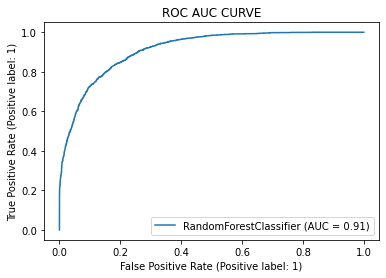

In [73]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show

#### Saving the model in pickel

In [74]:
import pickle
filename='cenus_income.pickle'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

# Documentation

In [ ]:
Import the csv file then seen the data we have not found null values in the columns.
Then we check for 0 values and we found lots of 0 values in columns Capital_gain and Capital_loss
Then the vizualization of the categorical and continuous data is done and seen some skewness in the continuous data that was removed with the power transform function.
Then encoding is done with the help of label encoder.
Then correlation is checked with the target variable and the columns ['Fnlwgt','Native_country'] has been removed since they have very less relationship with the target variable.
Then we checked for outliers and found that lots of data are the outliers  we didn't remove them as they are possible outcomes.
After scaling the data we checked for multicollinearity and not found in columns.
After that we trained the model with several algorithms and found Random Forest as the best algo for classification problem.And hyperparameter tuning is done
The ROC AUC curve is made and 91% is covered.
In the last we saved the model.